# LOAN DEFAULT PREDICTION
1.We will monitor the data carefully.
2.At this step , the data will be cleaned.


In [ ]:
def import_loan_prediction_data(file):
  import pandas as pd
  df = pd.read_csv(file)
  
  return(df)
df = import_loan_prediction_data('Default_Fin.csv')
print(df.head())
df

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


Now we will observe the missing ,unique and many other things

In [ ]:
def unistats(df):
  output_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Medain','75%','Max'])
  
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].unique(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                            df[col].mode().values[0],df[col].mean(),df[col].min(),df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),df[col].max()]
    else:
      output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].unique(),df[col].dtype,pd.api.types.is_numeric.dtype(df[col]),
                            df[col].mode().values[0],'-','-','-','-','-','-']
  return output_df
import pandas as pd
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',10000)

#df = pd.read_csv('Default_Fin.csv')
unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Medain,75%,Max
Index,10000,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,True,1,5000.500000,1,2500.75,5000.50,7500.25,10000
Employed,10000,0,"[1, 0]",int64,True,1,0.705600,0,0.00,1.00,1.00,1
Bank Balance,10000,0,"[8754.36, 9806.16, 12882.6, 6351.0, 9427.92, 1...",float64,True,0.0,10024.498524,0.0,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000,0,"[532339.56, 145273.56, 381205.68, 428453.88, 4...",float64,True,142868.16,402203.782224,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted?,10000,0,"[0, 1]",int64,True,0,0.033300,0,0.00,0.00,0.00,1


**Q1.**Here the grace period of 15 days will be given only to those who are employed and have annual salary greater than 100000 and bank balance greater than 5000.
count represnts those people

In [ ]:
count=0
datset = df.iloc[:,1:4].values
#print(datset)

for i in datset:
  if i[0]==1:
    if (i[1]>5000 and i[2]>100000):
      count=count+1
      
print("The number of people have a grace period of 15 days.",count)

The number of people have a grace period of 15 days. 5298


In [ ]:
The number of people have a grace period of 15 days. 5298


Q2.Here the bank will get fine only for those won't have any grace.
Those are the people who are employed but their annual salary is less than 100000 or their bank balance is less than 5000.

Formula = 0.025*bank balance*15

In [ ]:

datset = df.iloc[:,1:4].values
#print(datset)
amount=0
for i in datset:
  if i[0]==1:
    if (i[1]<5000 or i[2]<100000):
      count1=count1+1
      amount = amount+0.025*15*i[2]
print(amount)

316224614.6999998


In [ ]:
316224614.6999998

Q3. Here all the persons who are defaulters will pay the fine

In [ ]:
d =df.iloc[:,1:].values
fine=0
for i in d:
  if int(i[3]==1):
    fine = fine+0.025*i[1]
print(fine)

174607.371


In [ ]:
174607.371

Q4.here red represents eligible blue represents not eligible

[8754.36, 12882.6, 6351.0, 9427.92, 9906.12, 13932.72, 7280.88, 13355.64, 5831.28, 13140.84, 11451.12, 12671.52, 7703.76, 9278.52, 10260.12, 7716.0, 17458.32, 7388.4, 5937.84, 10963.08, 8304.36, 8911.56, 7837.44, 10465.68, 10047.12, 13819.56, 14863.32, 14739.72, 9851.04, 10289.88, 6763.44, 18439.08, 15990.24, 5904.96, 9194.76, 8281.56, 17767.92, 11868.72, 15628.08, 12534.6, 10392.36, 8289.6, 7173.12, 5153.88, 16777.92, 10284.84, 8740.44, 5183.04, 5539.68, 6864.24, 6122.88, 11190.36, 15993.36, 16852.56, 5393.64, 9840.24, 12572.64, 17064.24, 13913.28, 10595.88, 17558.76, 11498.04, 14490.36, 12679.32, 7163.52, 13430.16, 13372.8, 10404.36, 7322.76, 5396.88, 5160.0, 11138.88, 16481.4, 6986.28, 14597.4, 7181.52, 11325.6, 5300.88, 14263.68, 12187.32, 15102.84, 8778.36, 5026.2, 6398.76, 15677.76, 13789.8, 8438.76, 11858.52, 7769.76, 5342.88, 7999.32, 9766.56, 10035.6, 11609.76, 14877.6, 9487.2, 9474.0, 9496.32, 5748.48, 10663.32, 15412.68, 9352.56, 8369.88, 7283.64, 10801.08, 11595.36, 8052.72

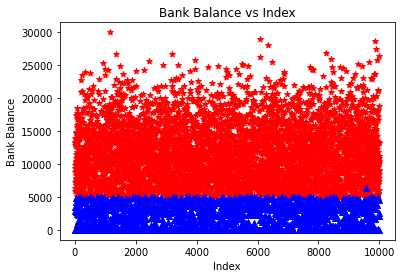

In [ ]:
dataset = df.iloc[:,0:4].values
eligible=[]
not_eligible=[]
no=[]
no1=[]
for i in dataset:
  if int(i[1])==1:
    if (i[2]>5000 and i[3]>100000):
      eligible.append(i[2])
      no.append(i[0])
    else:
      not_eligible.append(i[2])
      no1.append(i[0])

print(eligible)
print(no)
import matplotlib.pyplot as plt



plt.scatter(no,eligible,color = 'red',marker='*')
plt.scatter(no1,not_eligible,color = 'blue',marker='^')

plt.title('Bank Balance vs Index')
plt.xlabel('Index')
plt.ylabel('Bank Balance')

plt.show()

Q5. Here we will find the median respective to eligible for grace period people and for entire
Then find difference in the median between those who are eligible and total.

Formula used;
if n=odd
then m=n+1/2-1
if n=even
then m=((n/2-1)th value-(n/2)th value/)2

In [ ]:
def get_median(s):
    s.sort()
    if len(s) % 2 != 0:
        m = int((len(s)+1)/2 - 1)
        return s[m]
    else:
        m1 = int(len(s)/2 - 1)
        m2 = int(len(s)/2)
        return (s[m1]+s[m2])/2
b1 = get_median(eligible)
b2 = get_median(df['Bank Balance'].values)
print(b1-b2)

1115.4000000000015


In [ ]:
1115.4000000000015

q6.here red represents eligible blue represents not eligible
```
```



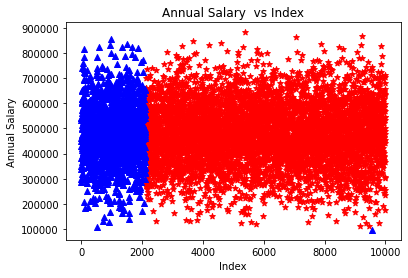

In [ ]:
dataset = df.iloc[:,0:4].values
eligible1=[]
not_eligible1=[]
no1=[]
no12=[]
for i in dataset:
  if int(i[1])==1:
    if (i[2]>5000 and i[3]>100000):
      eligible1.append(i[3])
      no1.append(i[0])
    else:
      not_eligible1.append(i[3])
      no12.append(i[0])


import matplotlib.pyplot as plt



plt.scatter(no1,eligible1,color = 'red',marker='*')
plt.scatter(no12,not_eligible1,color = 'blue',marker='^')

plt.title('Annual Salary  vs Index')
plt.xlabel('Index')
plt.ylabel('Annual Salary')

plt.show()